## Cyclistic bike-share analysis case study
### How does a bike-share navigate speedy success?

Cyclistic is a fictional bike-share company that has two type of customers, casual riders who use the service on a pay-as-you-go basis and members who purchase an annual subscription.   


## Business task

The business task can be stated as: Identify key differences on how casual riders and annual members use the bike-share service to fuel a targeted marketing compaign aiming at increasing the proportion of annual members within the customers pool.

## About Dataset

We will use historical trip data provided by Motivate International Inc. to analyze and identify trends.
This is a public dataset from a credible source. The data has been checked and is found to be reliable, original, comprehensive, current (last 12 months) and will enable us to answer the business questions.

In [2]:
# Import Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load in data from the past 12 months

apr_20 = pd.read_csv("202004-divvy-tripdata.csv", index_col = 'ride_id')
may_20 = pd.read_csv("202005-divvy-tripdata.csv", index_col = 'ride_id')
jun_20 = pd.read_csv("202006-divvy-tripdata.csv", index_col = 'ride_id')
jul_20 = pd.read_csv("202007-divvy-tripdata.csv", index_col = 'ride_id')
aug_20 = pd.read_csv("202008-divvy-tripdata.csv", index_col = 'ride_id')
sep_20 = pd.read_csv("202009-divvy-tripdata.csv", index_col = 'ride_id')
oct_20 = pd.read_csv("202010-divvy-tripdata.csv", index_col = 'ride_id')
nov_20 = pd.read_csv("202011-divvy-tripdata.csv", index_col = 'ride_id')
dec_20 = pd.read_csv("202012-divvy-tripdata.csv", index_col = 'ride_id')
jan_21 = pd.read_csv("202101-divvy-tripdata.csv", index_col = 'ride_id')
feb_21 = pd.read_csv("202102-divvy-tripdata.csv", index_col = 'ride_id')
mar_21 = pd.read_csv("202103-divvy-tripdata.csv", index_col = 'ride_id')
apr_21 = pd.read_csv("202104-divvy-tripdata.csv", index_col = 'ride_id')

In [5]:
# Combining all files in a single file

bike_share = pd.concat([apr_20,may_20, jun_20, jul_20, aug_20, sep_20, oct_20, nov_20, dec_20, jan_21, feb_21, mar_21, apr_21])

bike_share.head()
pd.DataFrame(bike_share)


In [6]:
bike_share.to_csv("Combine_all_file", index = True)

## 1.Data Cleaning

Let's perform some data cleaning 

In [6]:
# check there are no duplicate entries in a dataset

bike_share.drop_duplicates(keep = 'first', inplace=True)


In [7]:
# Check for missing values


print(bike_share.isnull().sum())


rideable_type              0
started_at                 0
ended_at                   0
start_station_name    148231
start_station_id      148857
end_station_name      171416
end_station_id        171877
start_lat                  0
start_lng                  0
end_lat                 5005
end_lng                 5005
member_casual              0
dtype: int64


We'll drop start_station_id and end_station_id columns as we're not intending to work with those two columns

In [8]:
# Drop start_station_id and end_station_id  columns

bike_share.drop(['start_station_id', 'end_station_id'], axis = 1, inplace = True)

In [9]:
# Rename some columns for consistency and clarity

bike_share = bike_share.rename(columns={'started_at': 'start_time', 'ended_at': 'end_time', 
                                            'start_station_name': 'start_station', 'end_station_name': 'end_station',
                                            'member_casual': 'user_type'})

In [10]:
# Remove leading and trailing spaces from all entries in columns with object dtype

object_cols = bike_share.select_dtypes('object').columns

for col in object_cols:
    bike_share[col] = bike_share[col].str.strip()
    

In [11]:
# Convert trip start and end times to datetime format

bike_share['start_time'] = pd.to_datetime(bike_share['start_time'])
bike_share['end_time'] = pd.to_datetime(bike_share['end_time'])

In [14]:
# Calculate trip duration in minutes

bike_share['trip_duration'] = (bike_share['end_time'] - bike_share['start_time'])/np.timedelta64(1, 'm')

In [15]:
# Keep only trips that have a duration greater than 0

bike_share = bike_share[bike_share['trip_duration'] > 0]

In [16]:
# Extract day of week for every ride

bike_share.loc[:, 'day_of_week'] = bike_share.loc[:, 'start_time'].dt.weekday

In [17]:
bike_share.head()

,rideable_type,start_time,end_time,start_station,end_station,start_lat,start_lng,end_lat,end_lng,user_type,trip_duration,day_of_week
ride_id,,,,,,,,,,,,
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,41.8964,-87.6610,41.9322,-87.6586,member,26.816667,6
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,41.9244,-87.7154,41.9306,-87.7238,member,8.150000,4
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,41.8945,-87.6179,41.8679,-87.6230,member,14.383333,2
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,41.9030,-87.6975,41.8992,-87.6722,member,12.200000,1
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,41.8902,-87.6262,41.9695,-87.6547,casual,52.916667,5


Let's fill the missing values of end_lat and end_lng columns with the average latitude and longitude values of the corresponding station. 

In [18]:
# Average end of trip latitude and longitude for each station

cordinate_m = bike_share.groupby('start_station')[['end_lat', 'end_lng']].mean()
cordinate_m.head()

,end_lat,end_lng
start_station,,
2112 W Peterson Ave,41.982532,-87.676120
63rd St Beach,41.796585,-87.586351
900 W Harrison St,41.875784,-87.649671
Aberdeen St & Jackson Blvd,41.881265,-87.650307
Aberdeen St & Monroe St,41.886367,-87.645339


In [19]:
# Index locations where the dataset is missing end latitude and end longitude information

indices_wo_end_cordinate_m = bike_share[bike_share['end_lat'].isnull()].index

In [ ]:
# Fill in with missing values for trip end latitude and longitude

for index in indices_wo_end_cordinate_m:
    station = bike_share.loc[index, 'start_station']
    bike_share.loc[index, 'end_lat'] = cordinate_m.loc[station,'end_lat']
    bike_share.loc[index, 'end_lng'] = cordinate_m.loc[station,'end_lng']

## Data Analysis

Let's start our analysis by finding out the proportions of annual members rides and casual rides in the dataset

Text(0, 0.5, '')

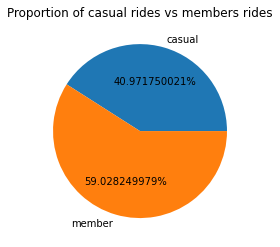

In [56]:
# casual rides vs members rides shown as percentage

bike_share.groupby('user_type')['user_type'].count().plot(kind = 'pie', autopct='%7.9f%%')
plt.title('Proportion of casual rides vs members rides')
plt.ylabel("")

**More than 40% of bike trips in the last 12 months are from casual riders, hence the objective of converting them to annual members to grab more revenue.**

Now we'll have a look have at how casual riders differ from annual members by calculating the average trip duration for each type of user.

In [26]:
df1 = bike_share.groupby('user_type')['trip_duration'].agg(['count','min', 'mean', 'max', 'median', 'std'])
df1

,count,min,mean,max,median,std
user_type,,,,,,
casual,1563282,0.016667,44.368964,55683.883333,20.933333,374.128813
member,2252230,0.016667,15.989799,58720.033333,11.383333,88.623406


Text(0.5, 1.0, 'Average trip duration by user type')

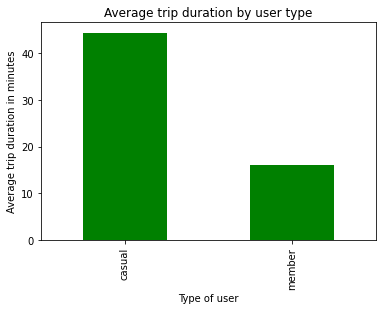

In [27]:
# Average trip duration by user type

df1['mean'].plot(kind = 'bar', color = 'g')
plt.xlabel ('Type of user')
plt.ylabel ('Average trip duration in minutes')
plt.title('Average trip duration by user type')

**Average trip duration of casual riders is about 3 times higher than annual members average trip duration. So let's estimate the average distance travelled by each type of customer to see what kind of conclusions we can possibly draw.**

We'll use Haversine formula calculate the distance travelled for each trip using latitude and longitude coordinates. We can already point out that this calculated distance will have one evident shortcoming as round trips i.e. trips that start and end at the same station will account for 0 km travelled.  

So let us first investigate the proportion of round trips in our dataset.

In [29]:
# Proportion of round trips in the entire dataset

bike_share[bike_share['start_station'] == bike_share['end_station']].shape[0] / bike_share.shape[0]


0.10221354303170846

In [31]:
# Proportion of round trips within casual rides

casual_rides = bike_share[bike_share['user_type']=='casual']

casual_rides[casual_rides['start_station'] == casual_rides['end_station']].shape[0] / casual_rides.shape[0]

0.17068705454294233

In [33]:
# Proportion of round trips within annual members rides

member_rides = bike_share[bike_share['user_type']=='member']

member_rides[member_rides['start_station'] == member_rides['end_station']].shape[0] / member_rides.shape[0]

0.054685800295706924

**We have about 10% of all rides being round trips, so overall it should not significantly affect the average travelled distance calculation.  
However the average distance travelled for casual rides will be less accurate than the one for their annual members counterpart, because round trips within casual rides account for 16.7% as compared to 5.2% round trips within annual members rides.** 

In [35]:
# Calculate travelled distance for each ride in the dataset (using Haversine formula)

p = np.pi/180

delta_lat = (bike_share['end_lat']-bike_share['start_lat'])*p 
delta_lng = (bike_share['end_lng']-bike_share['start_lng'])*p
a = np.sin(delta_lat/2)**2 + np.cos(bike_share['start_lat']*p) * np.cos(bike_share['end_lat']*p) * np.sin(delta_lng/2)**2

bike_share['trip_distance'] = 12742 * np.arcsin(np.sqrt(a))

Text(0.5, 1.0, 'Average distance travelled by user type')

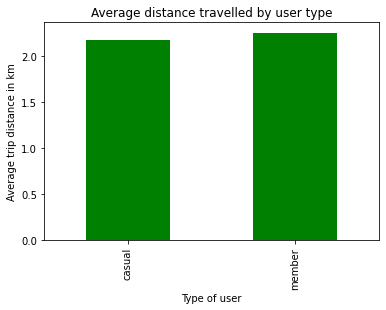

In [37]:
# Average trip distance by user type

bike_share.groupby('user_type')['trip_distance'].mean().plot(kind = 'bar', color = 'g')
plt.xlabel ('Type of user')
plt.ylabel ('Average trip distance in km')
plt.title('Average distance travelled by user type')

**The average distance travelled by the two user types is approximately the same, so this implies that on average casual rides happen at a much slower pace which suggest that casual riders use the service for leisure and touristic activities. On the other, annual members use the service for more pragmatic goals like working out or commuting to work.**

Now we'll explore how the days of the week affect trip taken by each type of customer.

In [38]:
# Number of rides by user type and day of the week

df2 = bike_share.groupby(['user_type','day_of_week'])['trip_duration'].agg(['count', 'mean', 'median'])

for i in range (7):
    daily_users = df2.loc[('casual', i), 'count'] + df2.loc[('member', i), 'count']
    df2.loc[('casual', i), 'percent'] = df2.loc[('casual', i), 'count'] / daily_users
    df2.loc[('member', i), 'percent'] = df2.loc[('member', i), 'count'] / daily_users
df2

count       mean     median   percent
user_type day_of_week                                        
casual    0            167162  44.237732  20.483333  0.361675
          1            165613  40.374418  19.083333  0.343757
          2            170355  40.167836  18.316667  0.340200
          3            178694  41.733991  18.233333  0.352331
          4            231402  42.615524  19.366667  0.403478
          5            362683  46.175269  23.233333  0.509123
          6            287373  50.008519  24.333333  0.497411
member    0            295027  15.254249  10.766667  0.638325
          1            316161  15.067084  10.833333  0.656243
          2            330395  15.172469  10.833333  0.659800
          3            328482  15.043838  10.800000  0.647669
          4            342116  15.643248  11.150000  0.596522
          5            349685  17.698516  12.833333  0.490877
          6            290364  18.092524  12.883333  0.502589

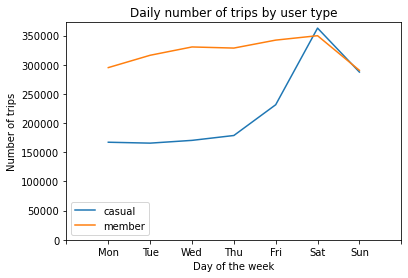

In [39]:
# Number of trips by user type on each day of the week

df2.loc[('casual', range(7)), 'count'].plot(label = 'casual')
df2.loc[('member', range(7)), 'count'].plot(label = 'member')

locs, labels = plt.xticks()
plt.xticks(locs, ["",'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', ""])
plt.xlabel ('Day of the week')
plt.ylabel ('Number of trips')
plt.ylim(0)
plt.title('Daily number of trips by user type')
plt.legend()

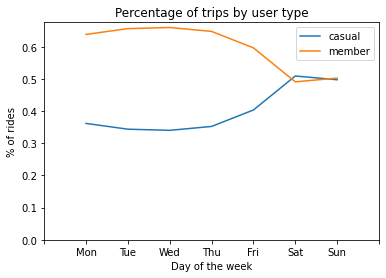

In [40]:
# Percentage of trips by user type on each day of the week

df2.loc[('casual', range(7)), 'percent'].plot(label = 'casual')
df2.loc[('member', range(7)), 'percent'].plot(label='member')

locs, labels = plt.xticks()
plt.xticks(locs, ["",'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', ""])
plt.xlabel ('Day of the week')
plt.ylabel ('% of rides')
plt.title('Percentage of trips by user type')
plt.ylim(0)
plt.legend()

**The number of trips is pretty steady from Monday to Thursday for both type of users. About 65% for members and 35% for casual users.
On Friday, the number of casual rides drastically increase while the number of members rides take the opposite direction.
The figures even out over the weekend (Saturday and Sunday) to approximately 50% for each user category.  
This reinforces the hypothesis that casual riders use the bikes for leisure, touristic and other weekend related activities, while annual members are more into pre-determined activities.**

We will finally look at route preferences if any.

In [43]:
# Concatenate start_station_name and end_station_name as a new column called route

bike_share['route'] = bike_share['start_station'] + '_' + bike_share['end_station']

In [45]:
# Proportion of casual rides with none or incomplete route information within casual rides
casual_rides = bike_share[bike_share['user_type']=='casual']
casual_rides[casual_rides['route'].isnull()].shape[0] / casual_rides.shape[0]

0.06061286447358826

In [47]:
# Proportion of members rides with none or incomplete route information within annual members rides
member_rides = bike_share[bike_share['user_type']=='member']
member_rides[member_rides['route'].isnull()].shape[0] / member_rides.shape[0]

0.06137383837352313

Since the above two proportions are the nearly same, we'll ignore all trips without start_station_name and/or end_station_name information and determine the proportion of bike trips on the most frequently used routes by each user category.  
We'll define a route as frequently used if it totals at least 500 trips.

In [48]:
# Proportion of rides on most frequently used routes by casual riders

s1 = bike_share[bike_share['user_type'] == 'casual'].groupby('route')['route'].count()
s1[s1 >= 500].sum() / s1.sum()

0.14154114973711754

In [49]:
# Proportion of rides on most frequently used routes by annual members
s2 = bike_share[bike_share['user_type'] == 'member'].groupby('route')['route'].count()
s2[s2 >= 500].sum() / s1.sum()

0.05379540178696068

**Casual rides tend to be more concentrated on the same routes as compared to trips taken by members.**

## Conclusion

In order to convert casual riders to annual members, my top 3 recommendations for the marketing coampaign based on the analysis we've conducted are:

* **Emphasize the annual membership benefits from leisure and weekend related activities standpoint.**  


* **Propose annual memberships with service options like weekends (aiming at converting casual riders) and weekdays (aiming at making annual membership even more compelling for current members).**  


* **Offer one year membership trial at a prescribed discount targeting routes most frequently used by casual riders.**
